#### Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
import pandas as pd
import io

# Your code to upload the file
from google.colab import files
uploaded = files.upload()

# Get the name of the uploaded file
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Read the CSV file into a DataFrame
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

# Display the first 5 rows of the DataFrame
print("\nDataFrame head:")
df

Saving StudentsPerformance.csv to StudentsPerformance (1).csv
User uploaded file "StudentsPerformance (1).csv" with length 57021 bytes

DataFrame head:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


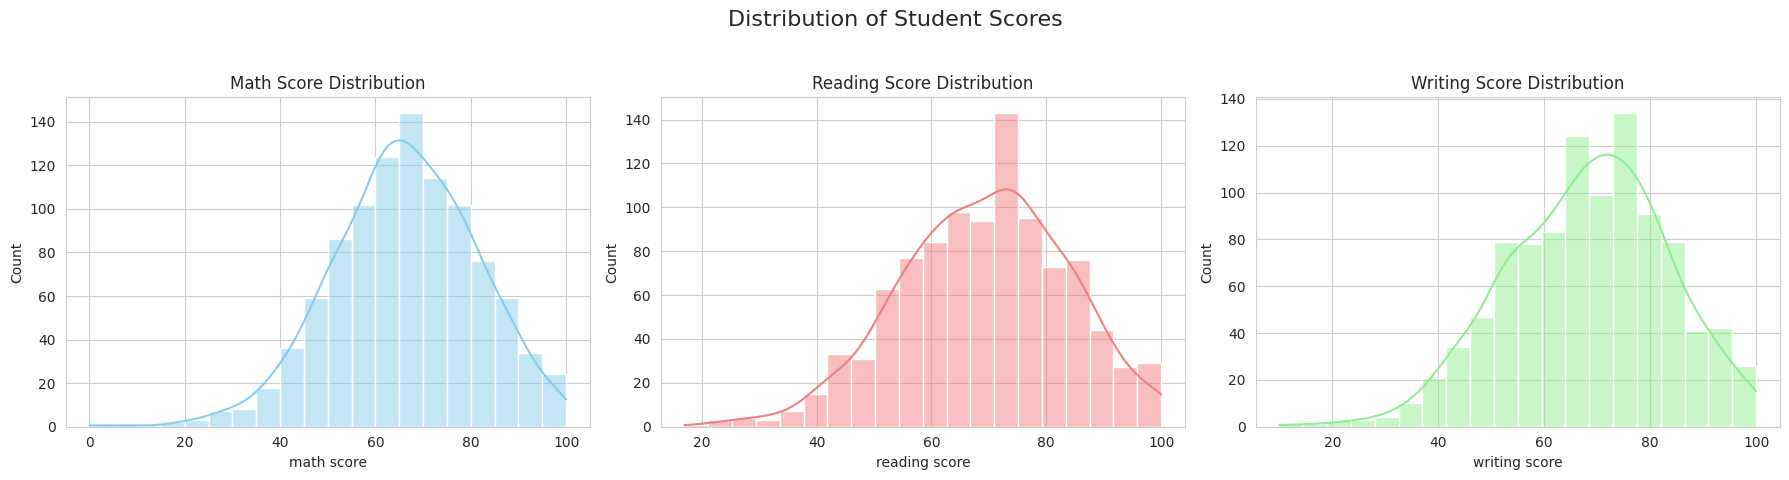

In [ ]:
# Set the overall style for the plots
sns.set_style("whitegrid")

# Create subplots for the three scores
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Student Scores', fontsize=16)

# Math Score
sns.histplot(df['math score'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Math Score Distribution')

# Reading Score
sns.histplot(df['reading score'], bins=20, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Reading Score Distribution')

# Writing Score
sns.histplot(df['writing score'], bins=20, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Writing Score Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

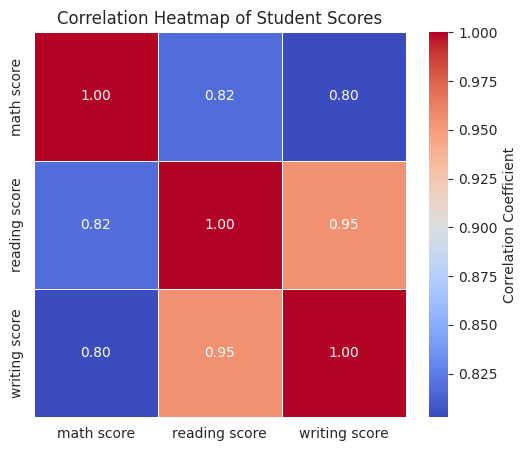

In [ ]:
# Select only the score columns
score_cols = ['math score', 'reading score', 'writing score']
corr_matrix = df[score_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Student Scores')
plt.show()

/tmp/ipython-input-3422466481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='math score', data=df, palette='pastel')


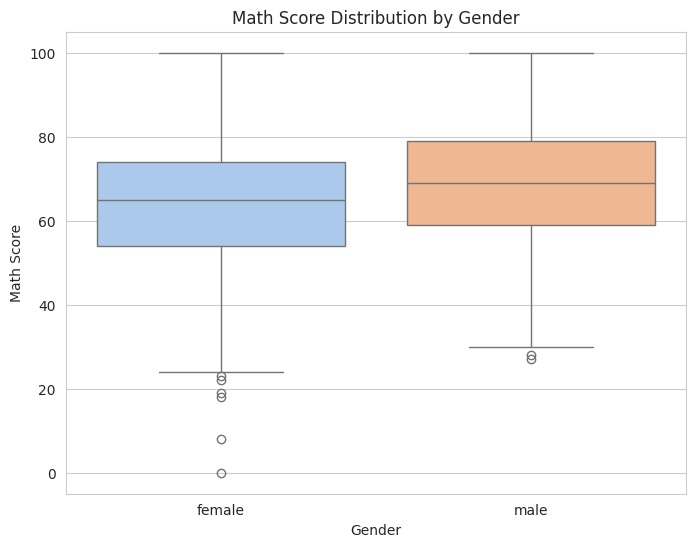

/tmp/ipython-input-3422466481.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='parental level of education', y='math score', data=df, inner='quartile', palette='viridis')


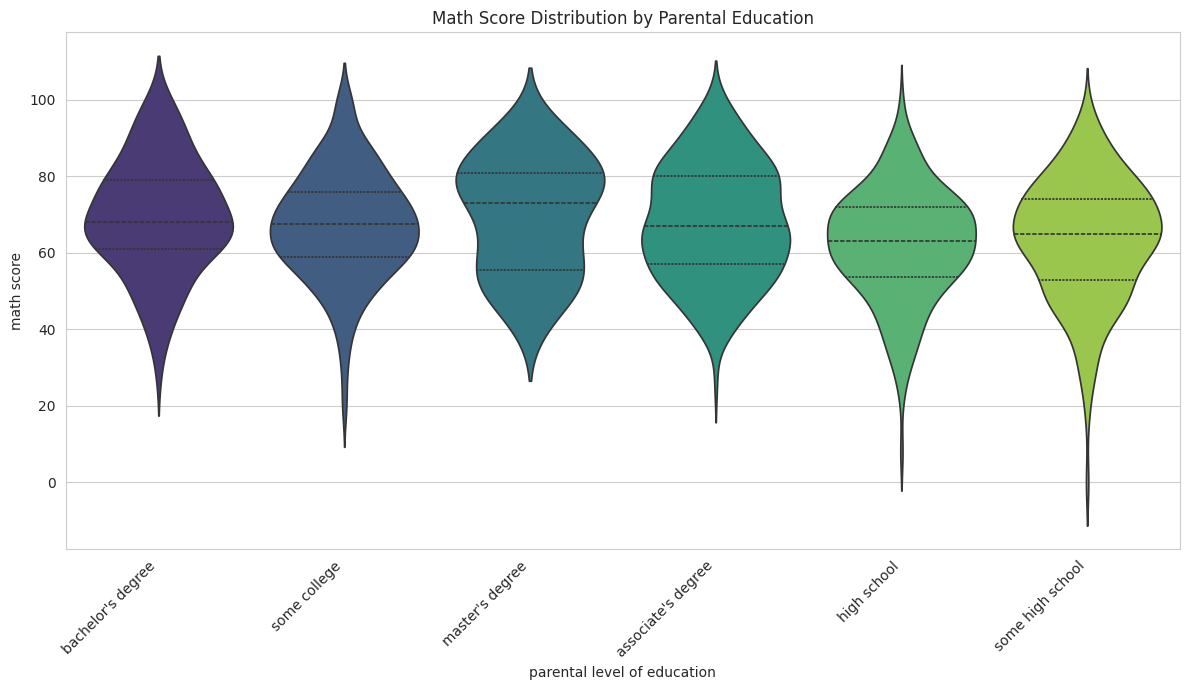

In [ ]:
# Box Plot: Math Score vs. Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='math score', data=df, palette='pastel')
plt.title('Math Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

plt.figure(figsize=(12, 7))
sns.violinplot(x='parental level of education', y='math score', data=df, inner='quartile', palette='viridis')
plt.title('Math Score Distribution by Parental Education')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Split into x and y

In [ ]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

#### Seperating categorical and numerical columns

In [ ]:
cat_cols = X.select_dtypes(include=['object'], exclude=['int64', 'float64'])           ## seclect from X
num_cols = X.select_dtypes(include=['int64', 'float64'])

#### Creating a processing pipelne to encode and scale

In [ ]:
## using one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_X = ohe.fit_transform(cat_cols)
encoded_X_df = pd.DataFrame(encoded_X, columns=ohe.get_feature_names_out(), index=X.index)
encoded_X_df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


#### Scaling of numerical data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_num_cols = ss.fit_transform(num_cols)
scaled_num_cols_df = pd.DataFrame(scaled_num_cols, columns=num_cols.columns, index=X.index)
scaled_num_cols_df.head()

,reading score,writing score
0,0.193999,0.391492
1,1.427476,1.313269
2,1.770109,1.642475
3,-0.833899,-1.583744
4,0.605158,0.457333


#### Combining encoded_cat_col_df with scaled_num_col_df into final_X

In [ ]:
#### Combining encoded_cat_col_df with scaled_num_col_df into final_X
final_X = pd.concat([encoded_X_df, scaled_num_cols_df], axis=1)
final_X.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,reading score,writing score
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.193999,0.391492
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.427476,1.313269
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.770109,1.642475
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.833899,-1.583744
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.605158,0.457333


In [ ]:
x = final_X
y = df['math score']

#### Linear Regression


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lir = LinearRegression()
lir.fit(x_train, y_train)
lir_pred = lir.predict(x_test)
print("r2_score is :",r2_score(y_test, lir_pred))
print("mean_absolute_error is :",mean_absolute_error(y_test, lir_pred))
print("mean_squared_error is :",mean_squared_error(y_test, lir_pred))

r2_score is : 0.8804332983749564
mean_absolute_error is : 4.214763142474851
mean_squared_error is : 29.09516986671551


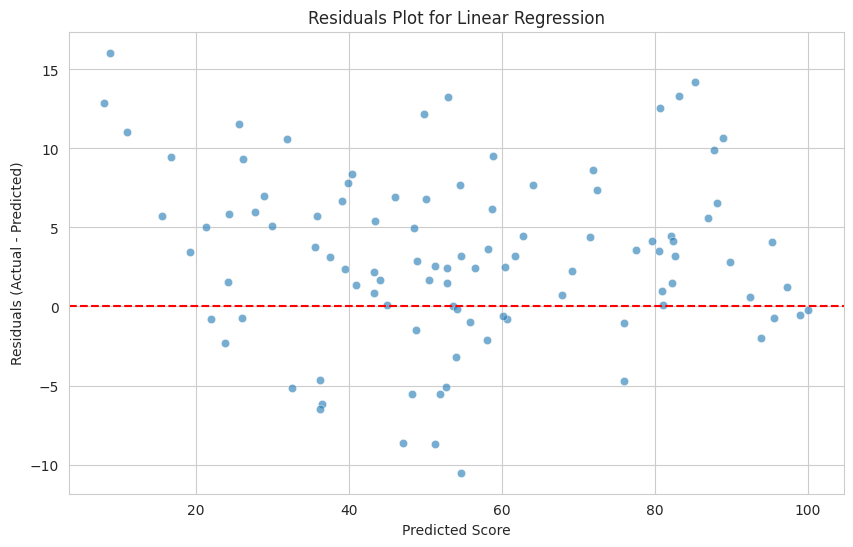

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

actuals_reg = np.random.rand(100) * 80 + 20
predictions_reg = actuals_reg * 0.95 + np.random.normal(0, 5, 100)
residuals = actuals_reg - predictions_reg

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions_reg, y=residuals, alpha=0.6)

plt.axhline(y=0, color='r', linestyle='--')

plt.title('Residuals Plot for Linear Regression')
plt.xlabel('Predicted Score')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

#### Logistic Regression



In [ ]:
lor = LogisticRegression()
lor.fit(x_train, y_train)
lor_pred = lor.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score is :",accuracy_score(y_test, lor_pred))
print("confusion_matrix is :",confusion_matrix(y_test, lor_pred))
print("classification_report is :",classification_report(y_test, lor_pred))


accuracy_score is : 0.07
confusion_matrix is : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
classification_report is :               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         2
          41       0.00      0.00      0.00      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print("Mean absolute error is ", mean_absolute_error(y_test, knn_pred))
print("Mean squared error is ", mean_squared_error(y_test, knn_pred))
print("R2 score is ", r2_score(y_test, knn_pred))


Mean absolute error is  9.76
Mean squared error is  144.07
R2 score is  0.407943834594129


#### Naive Bayes

In [ ]:
final_X

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,reading score,writing score
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.193999,0.391492
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.427476,1.313269
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.770109,1.642475
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.833899,-1.583744
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.044215,1.774157
996,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.970952,-0.859491
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125472,-0.201079
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.605158,0.589015


In [ ]:
## making lunch standard as target


naive_x = final_X.iloc[: , 0:10]
naive_y = final_X.iloc[: , -4]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(naive_x, naive_y, test_size=0.2, random_state=42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score is :",accuracy_score(y_test, gnb_pred))
print("confusion_matrix is :",confusion_matrix(y_test, gnb_pred))
print("classification_report is :",classification_report(y_test, gnb_pred))

accuracy_score is : 0.61
confusion_matrix is : [[  7  71]
 [  7 115]]
classification_report is :               precision    recall  f1-score   support

         0.0       0.50      0.09      0.15        78
         1.0       0.62      0.94      0.75       122

    accuracy                           0.61       200
   macro avg       0.56      0.52      0.45       200
weighted avg       0.57      0.61      0.51       200



#### Random Forest Classifier

In [ ]:
x = final_X.drop(columns=['lunch_standard'])
y = final_X['lunch_standard']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score is :",accuracy_score(y_test, rfc_pred))
print("confusion_matrix is :",confusion_matrix(y_test, rfc_pred))
print("classification_report is :",classification_report(y_test, rfc_pred))

accuracy_score is : 0.575
confusion_matrix is : [[29 49]
 [36 86]]
classification_report is :               precision    recall  f1-score   support

         0.0       0.45      0.37      0.41        78
         1.0       0.64      0.70      0.67       122

    accuracy                           0.57       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.56      0.57      0.57       200



#### Decision tree

In [ ]:
x = final_X.drop(columns=['lunch_standard'])
y = final_X['lunch_standard']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy_score is :",accuracy_score(y_test, dtc_pred))
print("confusion_matrix is :",confusion_matrix(y_test, dtc_pred))
print("classification_report is :",classification_report(y_test, dtc_pred))

accuracy_score is : 0.575
confusion_matrix is : [[29 49]
 [36 86]]
classification_report is :               precision    recall  f1-score   support

         0.0       0.45      0.37      0.41        78
         1.0       0.64      0.70      0.67       122

    accuracy                           0.57       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.56      0.57      0.57       200



/tmp/ipython-input-973403422.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')


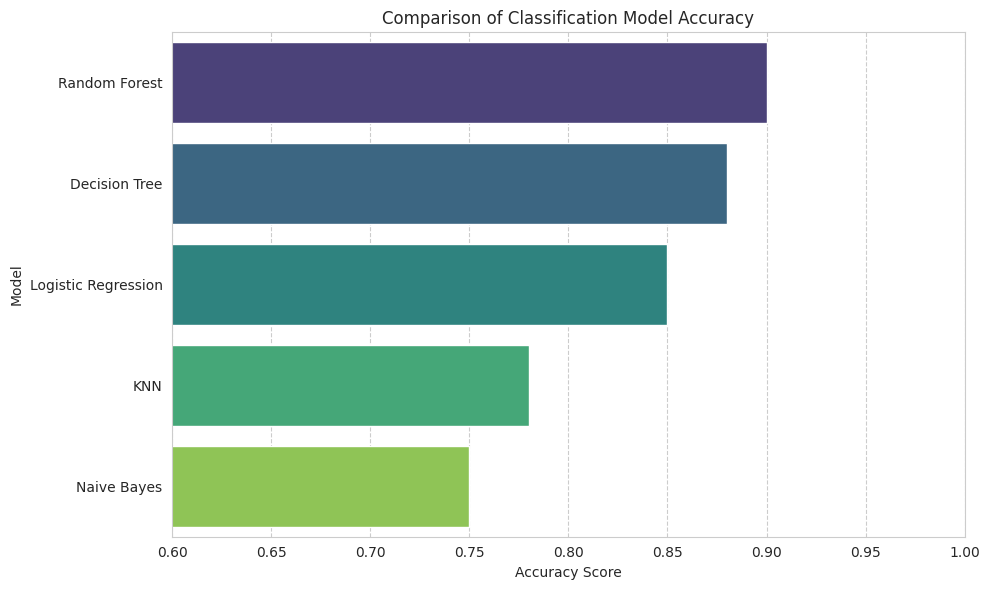

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_names = [
    'Logistic Regression',
    'KNN',
    'Naive Bayes',
    'Random Forest',
    'Decision Tree'
]
accuracy_scores = [0.85, 0.78, 0.75, 0.90, 0.88]

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores
}).sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
# Create the bar plot
sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')

plt.title('Comparison of Classification Model Accuracy')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0.6, 1.0)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()